# Laboratorio 1

Juan Camilo Gallego 
CC: 1000098978

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions, get_distributions
import seaborn as sns
import re
from scipy import stats

# Parte 1

## Pregunta 1

In [2]:
# 1. Leer el dataset desde el github
url = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df = pd.read_csv(url)

## Pregunta 2

In [3]:
# 2. Definir como indice la columna time
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

## Pregunta 3

In [4]:
# 3. Obtener información del data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8 KB


In [5]:
df.head()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2022-07-25 13:00:00,0,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,2,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,3,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,4,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365


In [6]:
df.tail()

,Unnamed: 0,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,,
2023-05-12 19:00:00,4995,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,4996,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,4997,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
2023-05-12 22:00:00,4998,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140
2023-05-12 23:00:00,4999,1.08521,1.08522,1.08478,1.08494,706,8,0,1.085075,-0.00024,-0.00010,-0.000170


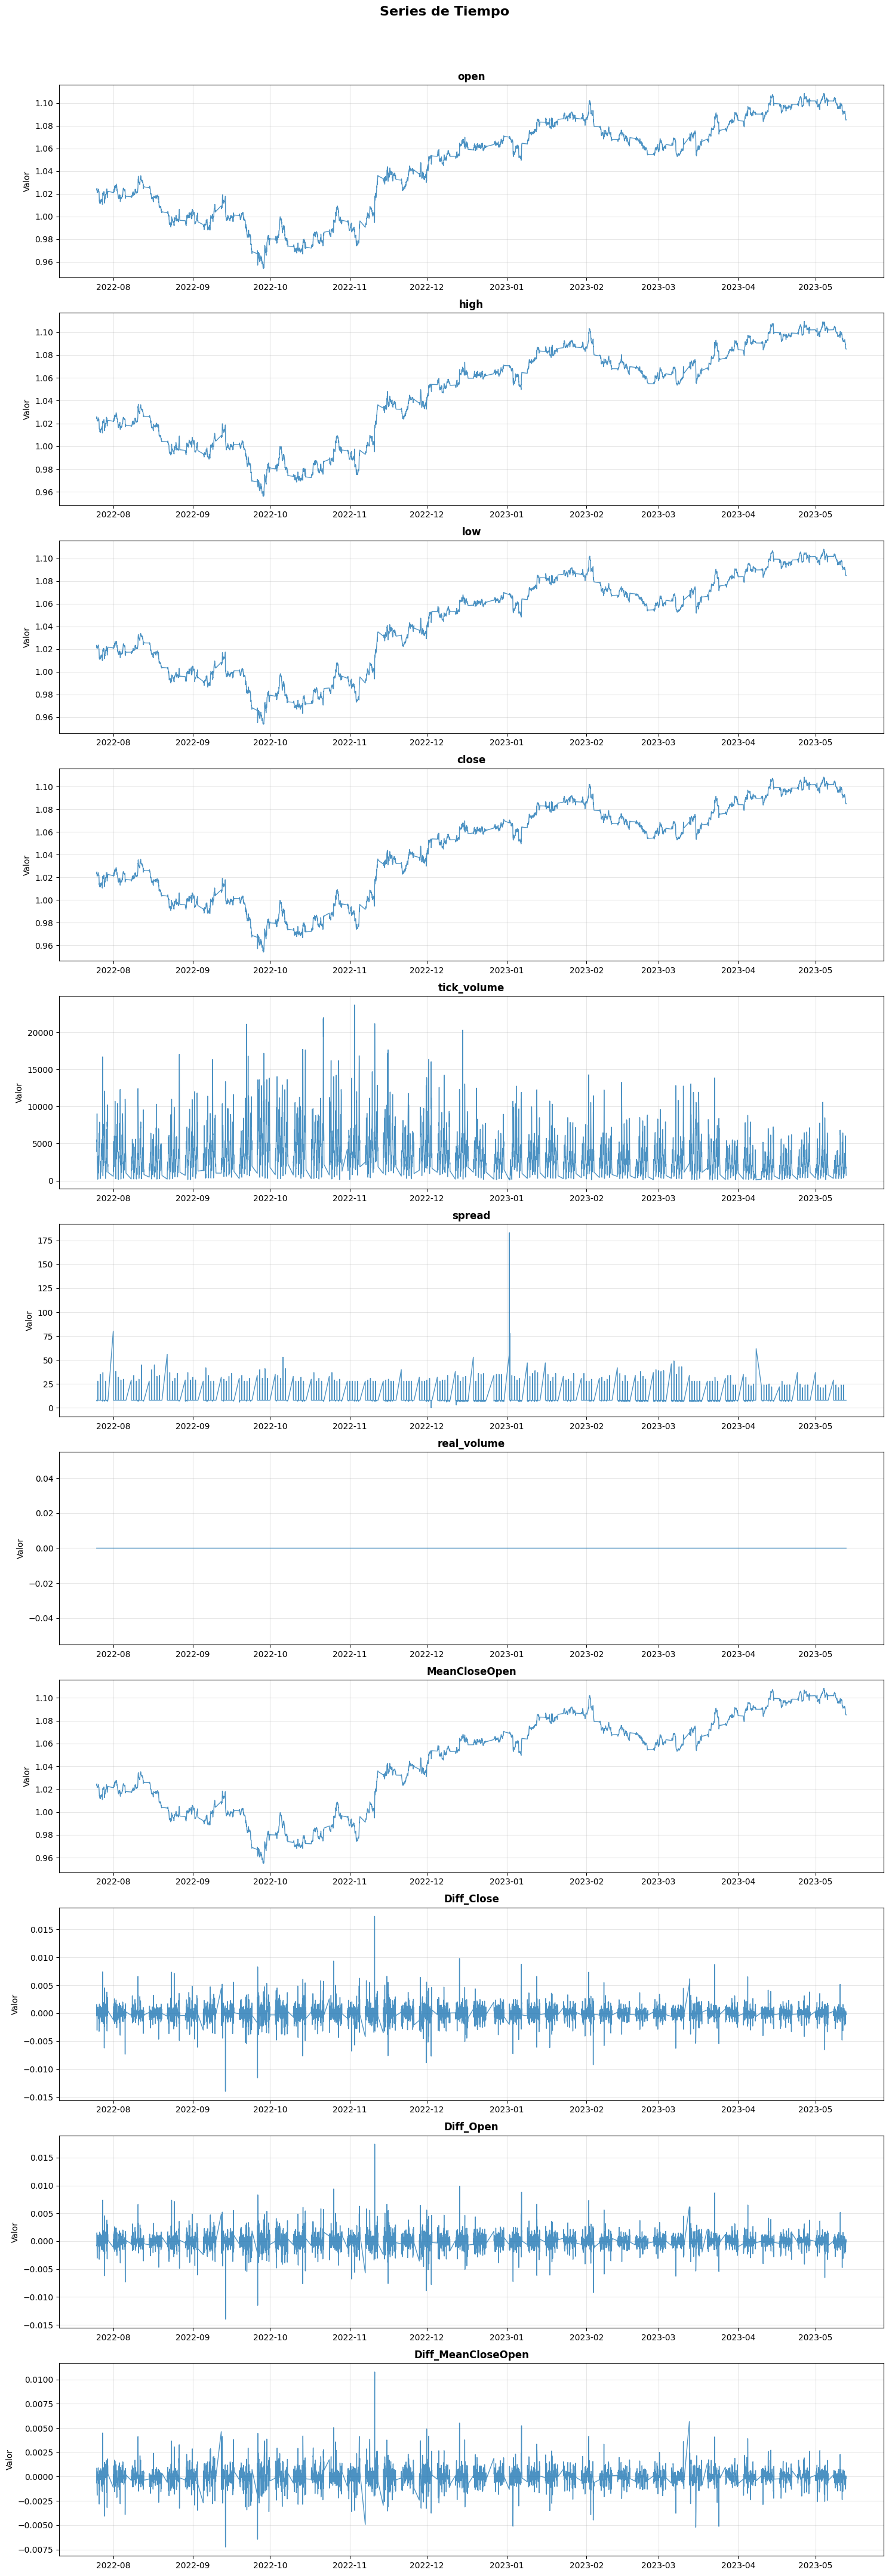

In [7]:
columnas = df.columns[1:] #no hay necesidad de hacer serie de tiempo del indice anterior
n_cols = len(columnas)

# Configurar subplots
fig, axes = plt.subplots(n_cols, 1, figsize=(15, 4*n_cols))
fig.suptitle('Series de Tiempo', fontsize=16, fontweight='bold')

for i, columna in enumerate(columnas):
    # Crear serie de tiempo
    serie = df[columna]
    
    # Graficar
    axes[i].plot(serie.index, serie.values, linewidth=1, alpha=0.8)
    axes[i].set_title(f'{columna}', fontweight='bold')
    axes[i].set_ylabel('Valor')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

vemos que el valor de realvolume es siempre 0, y que otras tienen una volatilidad muy alta o una periodicidad temporal mucho mas baja que los meses que se logran apreciar en las series de tiempo graficadas

## Pregunta 4

In [8]:
# 4. Determinar si hay null, nan en el data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5000 non-null   int64  
 1   open                5000 non-null   float64
 2   high                5000 non-null   float64
 3   low                 5000 non-null   float64
 4   close               5000 non-null   float64
 5   tick_volume         5000 non-null   int64  
 6   spread              5000 non-null   int64  
 7   real_volume         5000 non-null   int64  
 8   MeanCloseOpen       5000 non-null   float64
 9   Diff_Close          5000 non-null   float64
 10  Diff_Open           5000 non-null   float64
 11  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8 KB


In [9]:
df.isnull().value_counts()

Unnamed: 0  open   high   low    close  tick_volume  spread  real_volume  MeanCloseOpen  Diff_Close  Diff_Open  Diff_MeanCloseOpen
False       False  False  False  False  False        False   False        False          False       False      False                 5000
Name: count, dtype: int64

In [10]:
df.isna().value_counts()

Unnamed: 0  open   high   low    close  tick_volume  spread  real_volume  MeanCloseOpen  Diff_Close  Diff_Open  Diff_MeanCloseOpen
False       False  False  False  False  False        False   False        False          False       False      False                 5000
Name: count, dtype: int64

Ya se habia observado con df.info que no hay valores nulos aunque real_volume tiene todos sus valores = 0

## Pregunta 5

In [11]:
# 5. Emplear notación Pascal Case y trabajar solo con precio de cierre
# Renombrar columnas a Pascal Case
df.columns = [col.capitalize() for col in df.columns]
# Seleccionar solo Close y mantener el índice
df_close = df[['Close']]
df_close.columns = ['Close']  # Renombrar a Pascal Case
df_close

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


## Pregunta 6

In [12]:
# 6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
# - Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
# - Para la nueva columna construya un histograma de los datos.
# - Determine la mejor distribucion estadística que se ajusta al histograma 
df_close.loc[:,'DiffPrice']=df_close.loc[:,('Close')].diff()
df_close

/tmp/ipykernel_61995/1636142636.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close.loc[:,'DiffPrice']=df_close.loc[:,('Close')].diff()


,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,NaN
2022-07-25 14:00:00,1.02299,-0.00046
2022-07-25 15:00:00,1.02457,0.00158
2022-07-25 16:00:00,1.02485,0.00028
2022-07-25 17:00:00,1.02181,-0.00304
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


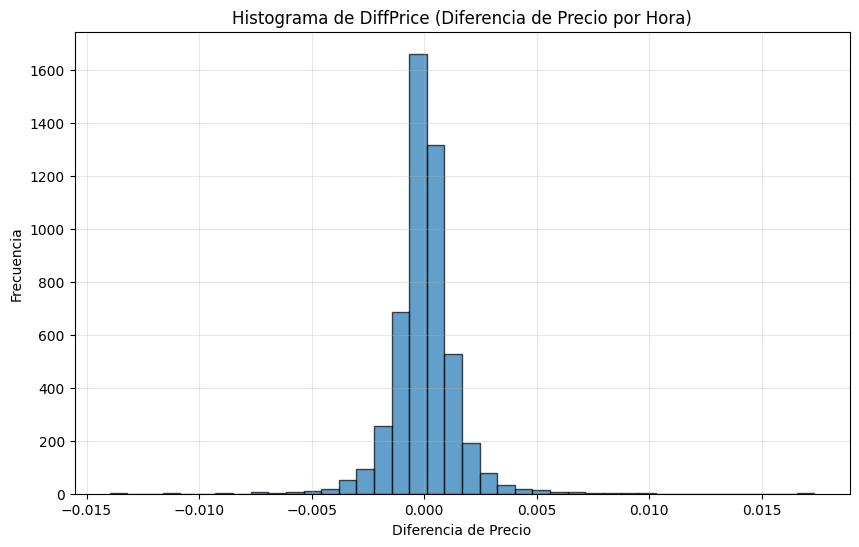

In [13]:
# Eliminar el primer valor NaN de DiffPrice
df_close = df_close.dropna()

# Histograma de DiffPrice
plt.figure(figsize=(10, 6))
plt.hist(df_close['DiffPrice'], bins=40, alpha=0.7, edgecolor='black')
plt.title('Histograma de DiffPrice (Diferencia de Precio por Hora)')
plt.xlabel('Diferencia de Precio')
plt.ylabel('Frecuencia')
plt.grid(alpha=0.3)
plt.show()

2025-08-23 12:43:07.030 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=106744.023571)
2025-08-23 12:43:07.203 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=106677.525909)
2025-08-23 12:43:07.259 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=923360.482403)
2025-08-23 12:43:07.463 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=106500.661168)
2025-08-23 12:43:07.552 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=721804.561088)


{'lognorm': {'s': 0.009509964461157715,
  'loc': -0.1471693008245066,
  'scale': 0.14717494036949658}}

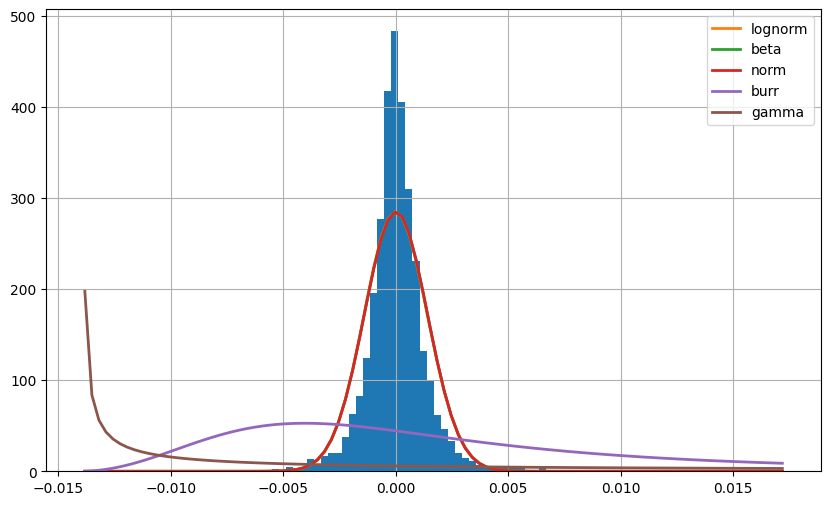

In [14]:

from fitter import Fitter, get_common_distributions, get_distributions
plt.figure(figsize=(10, 6))
data = df_close['DiffPrice'].values

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')


2025-08-23 12:43:08.113 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted laplace distribution with error=6365.89441)
2025-08-23 12:43:08.113 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=106744.023571)
2025-08-23 12:43:08.167 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted cauchy distribution with error=23122.545603)
2025-08-23 12:43:08.332 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted t distribution with error=2648.868472)
2025-08-23 12:43:08.732 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted burr distribution with error=721804.561088)
2025-08-23 12:43:09.832 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted beta distribution with error=106677.525909)
2025-08-23 12:43:09.948 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distribution with error=923360.482403)
2025-08-23 12:43:10.077 | INFO     | fitter.fitter:_fit_single_distribut


Mejor distribución:
{'t': {'df': 1.9892152720178555, 'loc': -3.417438470653069e-06, 'scale': 0.0007268128428503013}}

Parámetros de la distribución t:
(1.9892152720178555, -3.417438470653069e-06, 0.0007268128428503013)


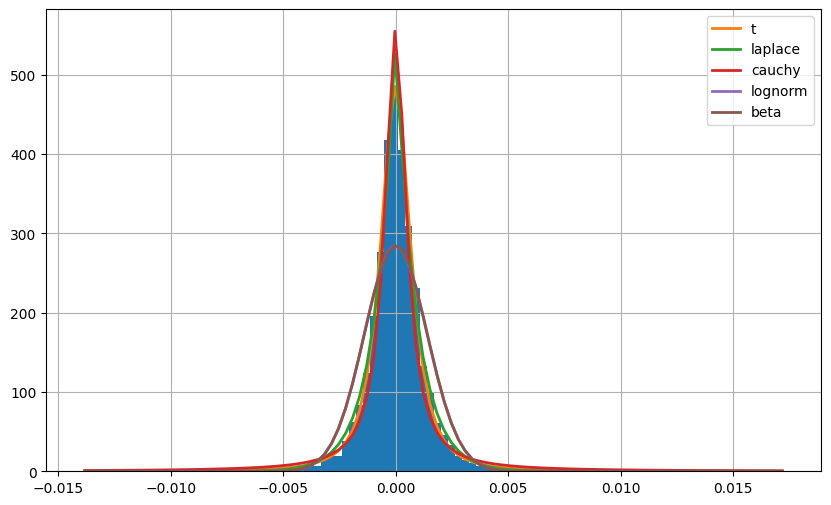

In [15]:
# Ajustar distribuciones estadísticas
plt.figure(figsize=(10, 6))

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm",
                          "cauchy",
                          "laplace",
                          "t"])
f.fit()
f.summary()

# Identificar la mejor distribución
best_dist = f.get_best(method='sumsquare_error')
print("\nMejor distribución:")
print(best_dist)

# Mostrar parámetros de la mejor distribución
best_dist_name = list(best_dist.keys())[0]
print(f"\nParámetros de la distribución {best_dist_name}:")
print(f.fitted_param[best_dist_name])

La mejor distribucion es t student

## Pregunta 7

In [16]:
#7. Para el data frame, seleccionemos solo los datos del 2023.
df_close.index=pd.to_datetime(df_close.index)
df_close_2023 = df_close.loc['2023']
df_close_2023

,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00200
2023-01-02 01:00:00,1.06965,0.00169
2023-01-02 02:00:00,1.07058,0.00093
2023-01-02 03:00:00,1.06896,-0.00162
2023-01-02 04:00:00,1.06880,-0.00016
...,...,...
2023-05-12 19:00:00,1.08514,-0.00038
2023-05-12 20:00:00,1.08546,0.00032
2023-05-12 21:00:00,1.08531,-0.00015


## Pregunta 8

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

In [17]:
print("\nPromedio cada 15 días:")
df_close_2023.groupby(pd.Grouper(freq='15D')).mean()


Promedio cada 15 días:


,Close,DiffPrice
time,,
2023-01-02,1.069361,0.000047
2023-01-17,1.085565,0.000015
2023-02-01,1.077679,-0.000066
2023-02-16,1.063150,-0.000034
2023-03-03,1.063186,0.000026
2023-03-18,1.080936,0.000074
2023-04-02,1.093090,0.000063
2023-04-17,1.099084,-0.000006
2023-05-02,1.098889,-0.000059


In [18]:
print("\nPromedio semanal:")
df_close_2023.groupby(pd.Grouper(freq='W')).mean()


Promedio semanal:


,Close,DiffPrice
time,,
2023-01-08,1.059972,-0.000047
2023-01-15,1.076002,0.000156
2023-01-22,1.082041,0.000020
2023-01-29,1.088414,0.000010
2023-02-05,1.089281,-0.000062
2023-02-12,1.073363,-0.000097
2023-02-19,1.069648,0.000014
2023-02-26,1.063374,-0.000124
2023-03-05,1.060854,0.000073


In [19]:
print("\nPromedio mensual:")
df_close_2023.groupby(pd.Grouper(freq='ME')).mean()


Promedio mensual:


,Close,DiffPrice
time,,
2023-01-31,1.077463,0.000031
2023-02-28,1.071167,-0.000060
2023-03-31,1.070874,0.000049
2023-04-30,1.096051,0.000036
2023-05-31,1.098980,-0.000069


## Pregunta 9

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el metodo groupby. Notetese que si no realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:


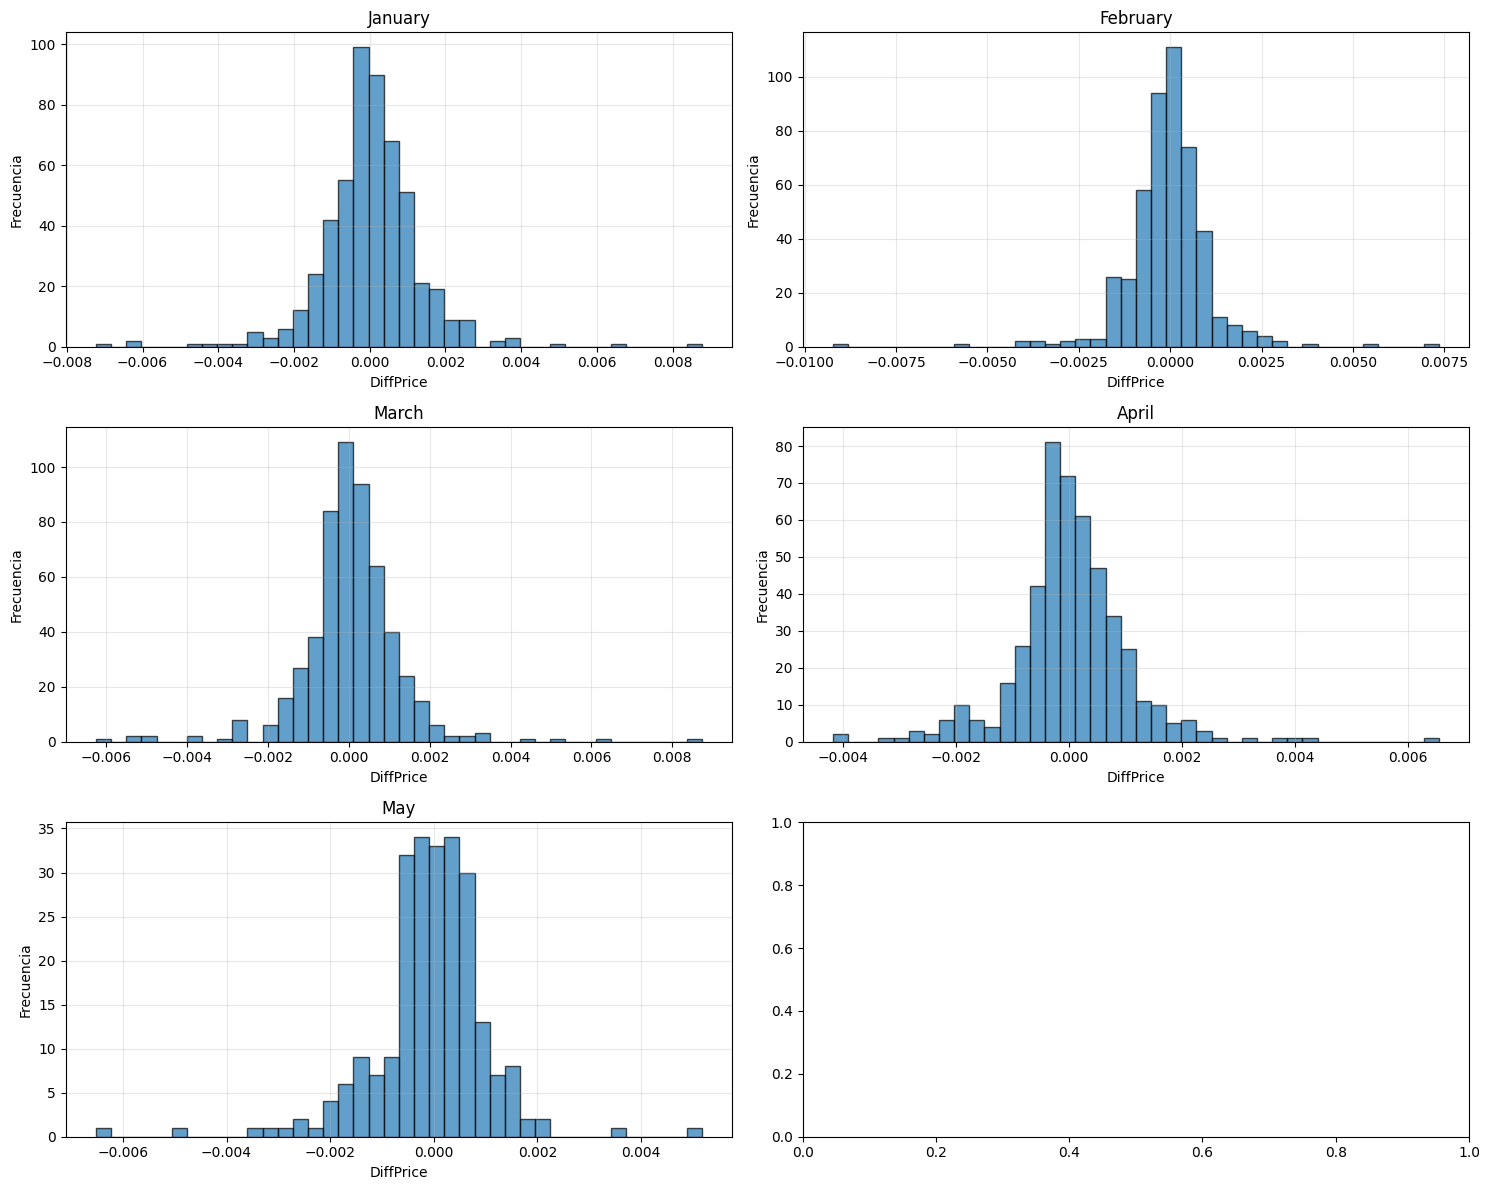

In [20]:
monthly_groups = df_close_2023.groupby(pd.Grouper(freq='ME'))

# Crear histogramas para cada mes
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()
i = 0
for name, data in monthly_groups: 
    axes[i].hist(data['DiffPrice'], bins=40, alpha=0.7, edgecolor='black')
    axes[i].set_title(name.month_name())
    axes[i].set_xlabel('DiffPrice')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(alpha=0.3)
    i += 1


plt.tight_layout()
plt.show()

# Parte 2

## Pregunta 1

In [21]:
#Leer los datos desde una página web.

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

## Pregunta 2

In [22]:
#Renombrar las columnas en formato PascalCase.
def pascal_case(s):
    palabra=''
    palabras=s.split('_')
    for i in palabras:
        if i[0].isupper():
            palabra+=i
        else:
            palabra+=i.capitalize()
    return palabra
new_columns=[pascal_case(i) for i in X.columns]

X.columns=new_columns
X.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3'],
      dtype='object')

## Pregunta 3

In [23]:
#Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame.
X.head()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
X.tail()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [25]:
X.describe()

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

Se puede ver que el estudio involucra 569 mujeres, y se tienen diferentes caracteristicas de las muestras, como el radio, perimetro ...

## Pregunta 4

In [27]:
X.isnull().value_counts()

Radius1  Texture1  Perimeter1  Area1  Smoothness1  Compactness1  Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  Radius2  Texture2  Perimeter2  Area2  Smoothness2  Compactness2  Concavity2  ConcavePoints2  Symmetry2  FractalDimension2  Radius3  Texture3  Perimeter3  Area3  Smoothness3  Compactness3  Concavity3  ConcavePoints3  Symmetry3  FractalDimension3
False    False     False       False  False        False         False       False           False      False              False    False     False       False  False        False         False       False           False      False              False    False     False       False  False        False         False       False           False      False                569
Name: count, dtype: int64

In [28]:
X.isna().value_counts()


Radius1  Texture1  Perimeter1  Area1  Smoothness1  Compactness1  Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  Radius2  Texture2  Perimeter2  Area2  Smoothness2  Compactness2  Concavity2  ConcavePoints2  Symmetry2  FractalDimension2  Radius3  Texture3  Perimeter3  Area3  Smoothness3  Compactness3  Concavity3  ConcavePoints3  Symmetry3  FractalDimension3
False    False     False       False  False        False         False       False           False      False              False    False     False       False  False        False         False       False           False      False              False    False     False       False  False        False         False       False           False      False                569
Name: count, dtype: int64

No hay Nan ni nulls


## Pregunta 5

In [29]:
y.loc[:,'Diagnosis'].unique()

array(['M', 'B'], dtype=object)

## Pregunta 6

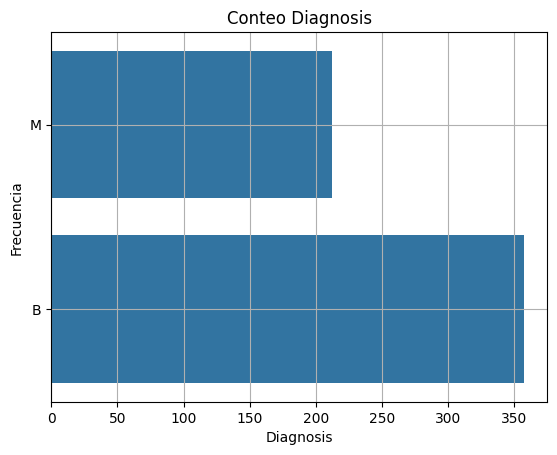

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [30]:
#Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot():
sns.countplot(y.loc[:,'Diagnosis'])
plt.title('Conteo Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
y.loc[:,'Diagnosis'].value_counts()

## Pregunta 7

In [31]:
#Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).
value = y.loc[:,'Diagnosis'].map({'B':0,'M':1})
X.loc[:,'DiagnosisNumeric'] = value
X

/tmp/ipykernel_61995/1993821367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'DiagnosisNumeric'] = value


,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


## Pregunta 8

In [32]:
#Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:

def normalize(x):
  return (x - x.mean())/x.std()
X_norm = X
for i in X.columns:
  if i == 'DiagnosisNumeric':
    continue
  X_norm.loc[:,i]=normalize(X.loc[:,i])
X_norm

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,ConcavePoints3,Symmetry3,FractalDimension3,DiagnosisNumeric
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,1
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,1


## Pregunta 9

In [33]:
# 9. Agrupar características similares y calcular su promedio.
#    Para las siguientes características:
# ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]

caracteristicas_columns=set(re.match(r'^[a-zA-Z_]+', i).group(0) for i in X_norm.columns)
caracteristicas_columns

{'Area',
 'Compactness',
 'ConcavePoints',
 'Concavity',
 'DiagnosisNumeric',
 'FractalDimension',
 'Perimeter',
 'Radius',
 'Smoothness',
 'Symmetry',
 'Texture'}

In [34]:
# DiagnosisNumeric no tiene merito hacer el mean por tanto se elimina
caracteristicas_columns.remove('DiagnosisNumeric')
caracteristicas_columns

{'Area',
 'Compactness',
 'ConcavePoints',
 'Concavity',
 'FractalDimension',
 'Perimeter',
 'Radius',
 'Smoothness',
 'Symmetry',
 'Texture'}

In [35]:
for i in caracteristicas_columns:
  columns=[col for col in X_norm.columns if col.startswith(i)]
  X_norm.loc[:,f'{i}Mean']=X_norm.loc[:,columns].mean(axis=1)
X_norm

,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,ConcavePoints1,Symmetry1,FractalDimension1,...,AreaMean,FractalDimensionMean,CompactnessMean,SmoothnessMean,SymmetryMean,TextureMean,RadiusMean,ConcavityMean,ConcavePointsMean,PerimeterMean
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.822793,1.698454,2.403566,0.886604,2.037172,-1.331460,1.822892,1.827201,1.828182,2.133644
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.512536,-0.228767,-0.536342,-0.602112,-0.349009,-0.532558,1.377122,-0.203612,0.631241,1.160448
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.397605,0.032286,0.982746,0.390527,0.775643,-0.115855,1.438879,0.809797,1.804099,1.253866
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.533818,3.960995,3.343920,2.453684,4.544703,0.092354,-0.241121,1.573617,1.579444,-0.185181
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.411195,-0.153272,0.059090,0.660750,-0.412639,-1.135278,1.438539,0.936729,1.099685,1.461481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,2.319074,-0.490281,0.045809,0.834796,-0.936231,0.303132,2.262762,1.091639,2.004001,2.062496
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.502133,-0.840309,-0.160662,-0.337297,-0.312618,2.129283,1.512694,0.393593,0.934487,1.397014
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.395171,-0.392078,0.324159,-0.675876,-0.934205,1.053425,0.482422,0.294468,0.377003,0.509009
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.464675,1.387908,3.062208,0.926916,1.459686,1.751949,1.651053,2.596660,1.909844,1.906541


## Pregunta 10

Crear un gráfico donde se muestre el histograma de la columna RadiusMean separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

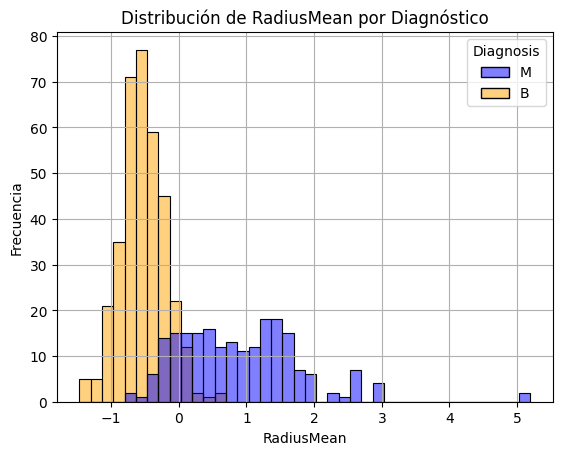

In [36]:
X_norm.loc[:,'Diagnosis']=y.loc[:,'Diagnosis']
sns.histplot(data=X_norm, x='RadiusMean', hue='Diagnosis', palette={'B': 'orange', 'M': 'blue'}, bins=40)
plt.title('Distribución de RadiusMean por Diagnóstico')
plt.xlabel('RadiusMean')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

## Pregunta 11 

Generar gráficos de violín para múltiples características. Para las columnas:

    RadiusMean
    TextureMean
    PerimeterMean
    AreaMean
    SmoothnessMean
    CompactnessMean
    ConcavityMean
    ConcavePointsMean
    Symmetry3
    FractalDimension3

Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:


In [37]:
# data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
# sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
# plt.xticks(rotation=45)

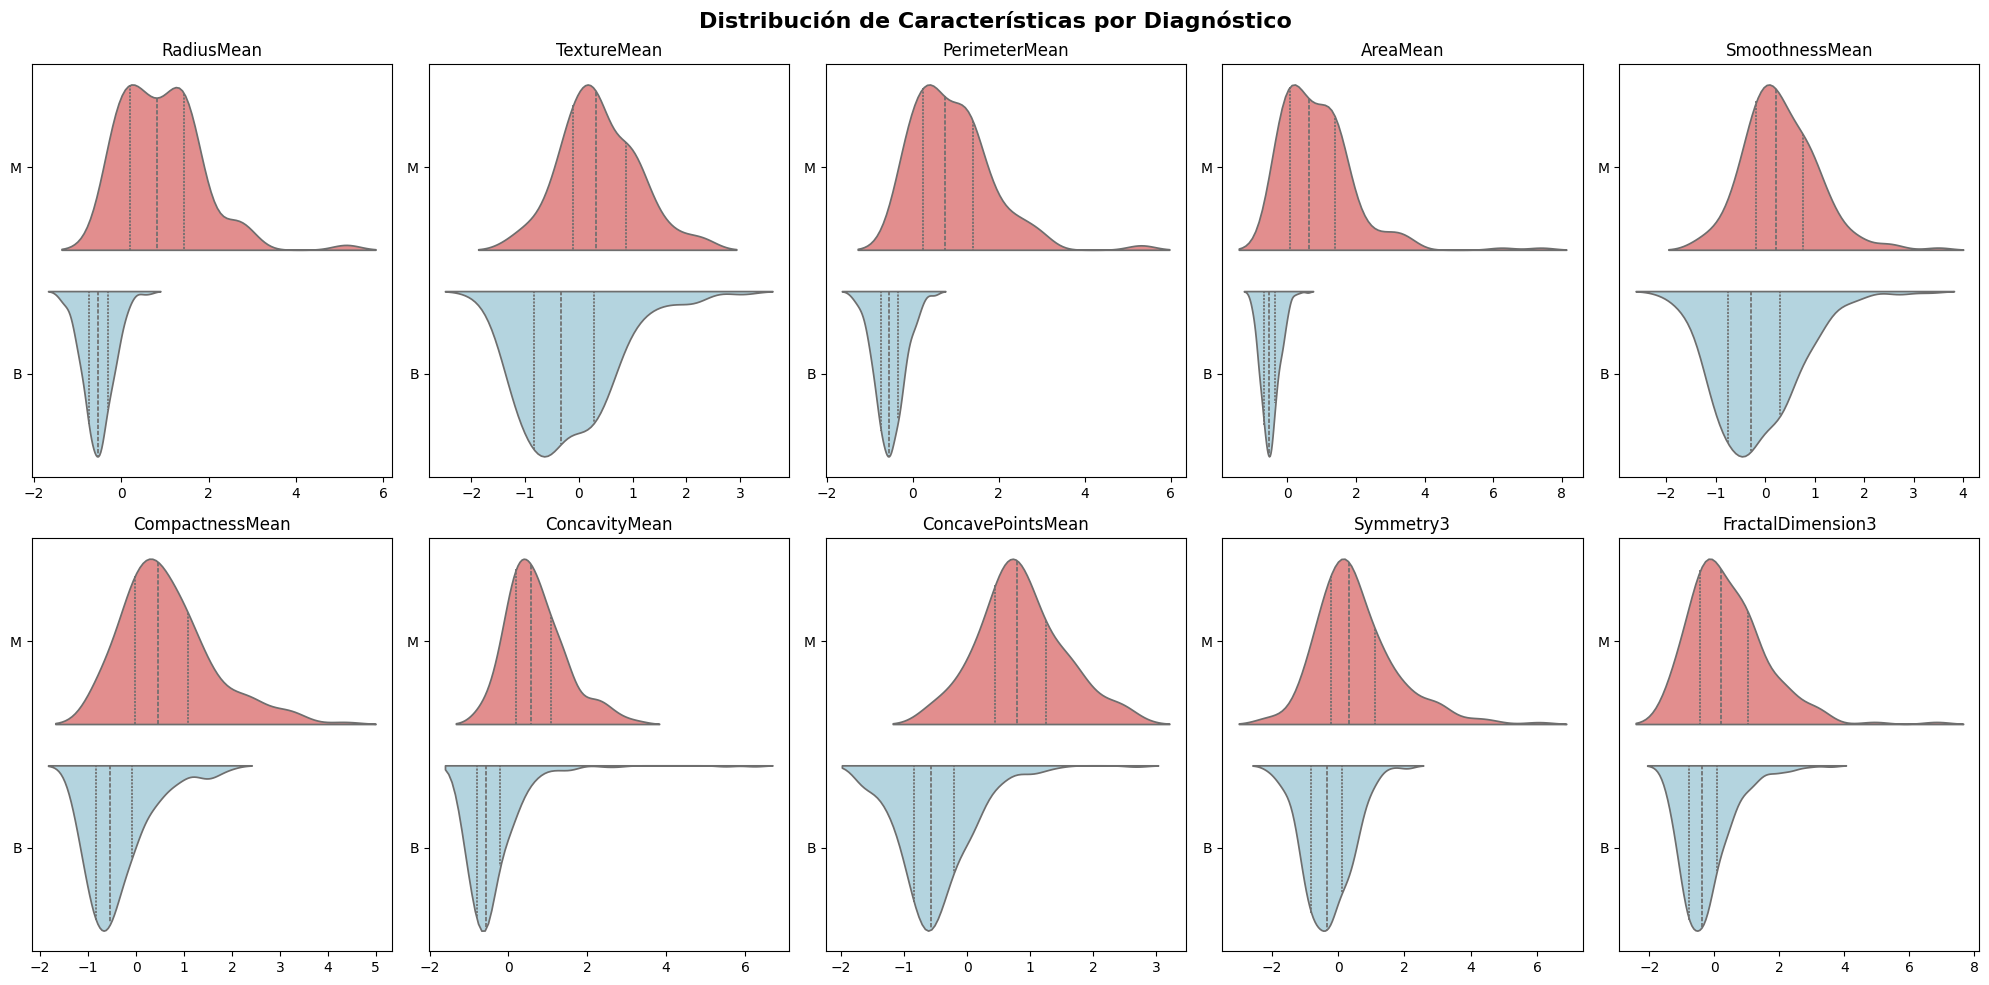

In [38]:
# Si prefieres violines separados en subplots
features = [
    'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 
    'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 
    'ConcavePointsMean', 'Symmetry3', 'FractalDimension3'
]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.violinplot(x=feature, y='Diagnosis', data=X_norm, hue='Diagnosis',legend=False,split=True, inner="quart",
                   ax=axes[i], palette={'B': 'lightblue', 'M': 'lightcoral'})
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.suptitle('Distribución de Características por Diagnóstico', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Pregunta 12 

Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python 
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```

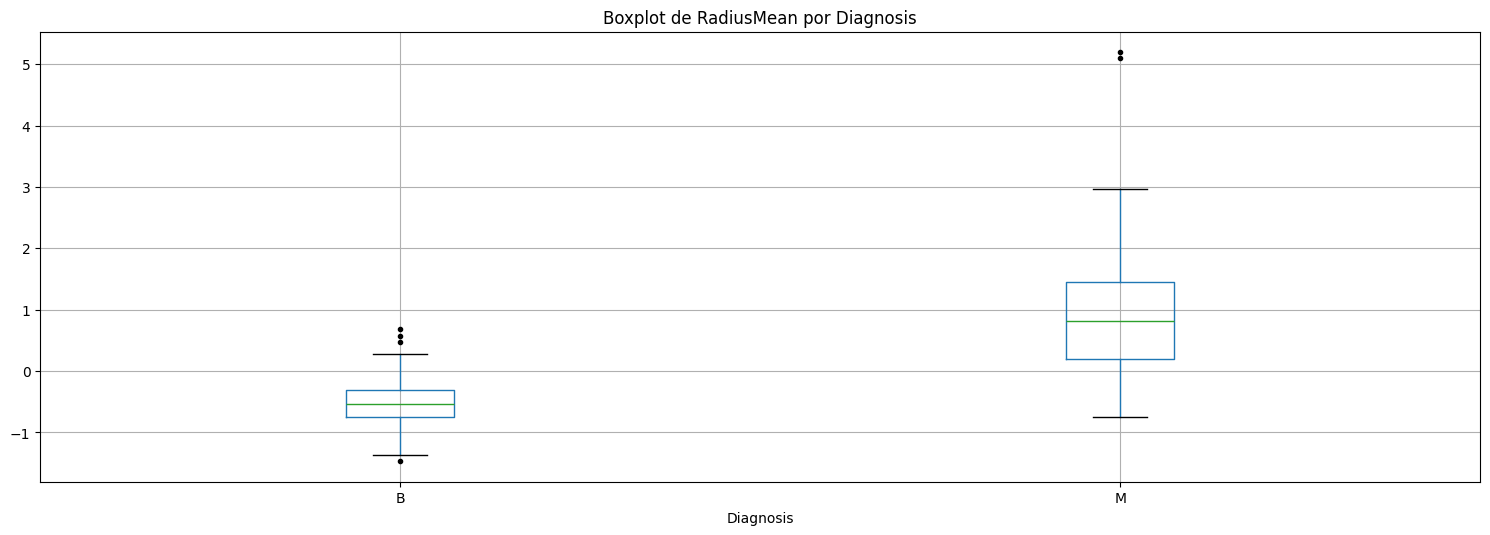

In [39]:
# plt.figure(figsize=(18, 6))
X_norm.boxplot(column="RadiusMean", by='Diagnosis', sym='k.',figsize=(18, 6))
plt.title('Boxplot de RadiusMean por Diagnosis')
plt.suptitle('')  
plt.show()


Diagnosis: M
  Muestras: 212
  Q1: 0.197, Q3: 1.444, IQR: 1.247
  Límites: [-1.674, 3.314]
  Outliers encontrados: 2
  Valores outliers: [5.106 5.195]

Diagnosis: B
  Muestras: 357
  Q1: -0.743, Q3: -0.312, IQR: 0.431
  Límites: [-1.390, 0.335]
  Outliers encontrados: 4
  Valores outliers: [-1.469  0.48   0.564  0.691]
Outliers eliminados: 6


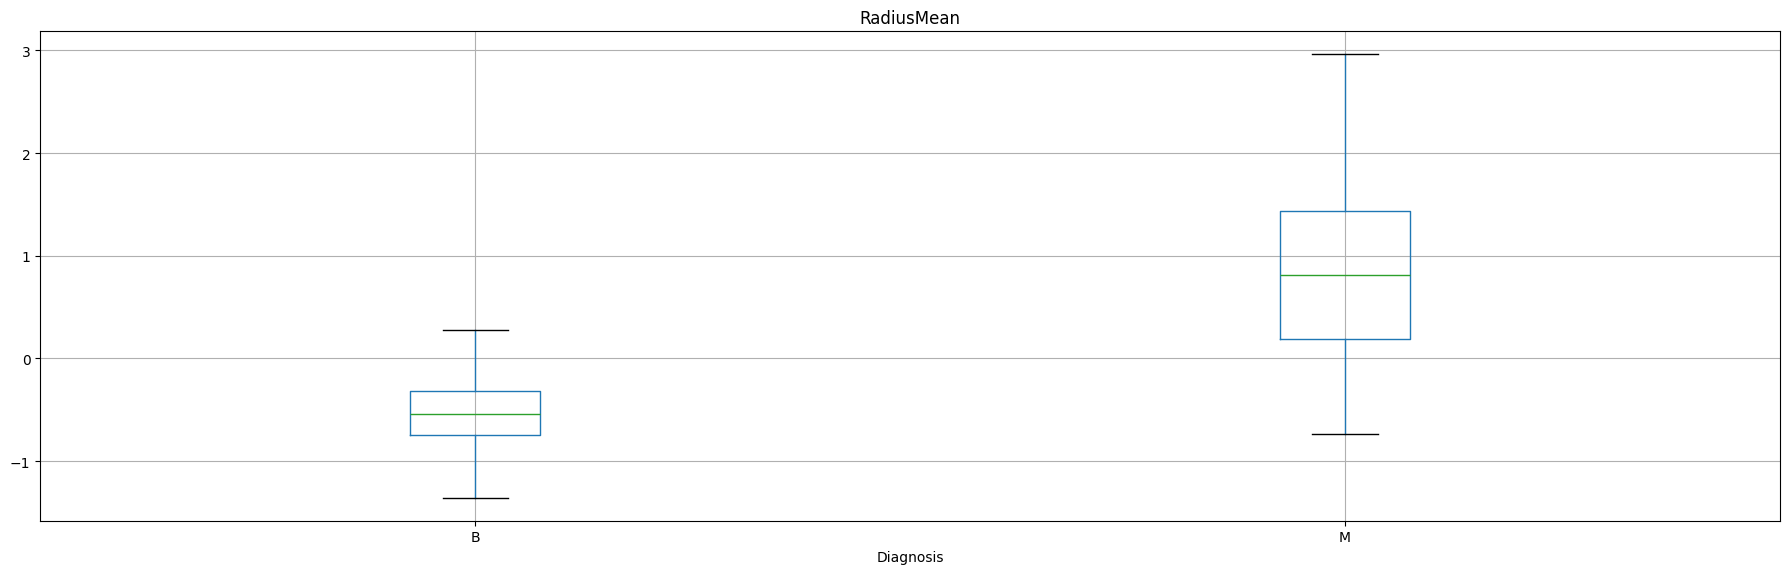

In [40]:
df_clean = X_norm.copy()


total_outliers = 0

for diagnosis in X_norm['Diagnosis'].unique():
    # Filtrar datos por diagnosis
    mask = X_norm['Diagnosis'] == diagnosis
    subset = X_norm.loc[mask, 'RadiusMean']
    
    # Calcular quartiles e IQR
    Q1 = subset.quantile(0.25)
    Q3 = subset.quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites para outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers_mask = (subset < lower_bound) | (subset > upper_bound)
    n_outliers = outliers_mask.sum()
    total_outliers += n_outliers
    
    # Mostrar estadísticas
    print(f"\nDiagnosis: {diagnosis}")
    print(f"  Muestras: {len(subset)}")
    print(f"  Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}")
    print(f"  Límites: [{lower_bound:.3f}, {upper_bound:.3f}]")
    print(f"  Outliers encontrados: {n_outliers}")
    
    if n_outliers > 0:
        print(f"  Valores outliers: {subset[outliers_mask].values.round(3)}")
    
    # Eliminar outliers de este grupo
    outlier_indices = subset[outliers_mask].index
    df_clean = df_clean[~df_clean.index.isin(outlier_indices)]

print(f"Outliers eliminados: {total_outliers}")

# # Después de eliminar outliers
df_clean.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18, 6))
plt.suptitle('')
plt.tight_layout()
plt.show()

## Pregunta 13 

Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.

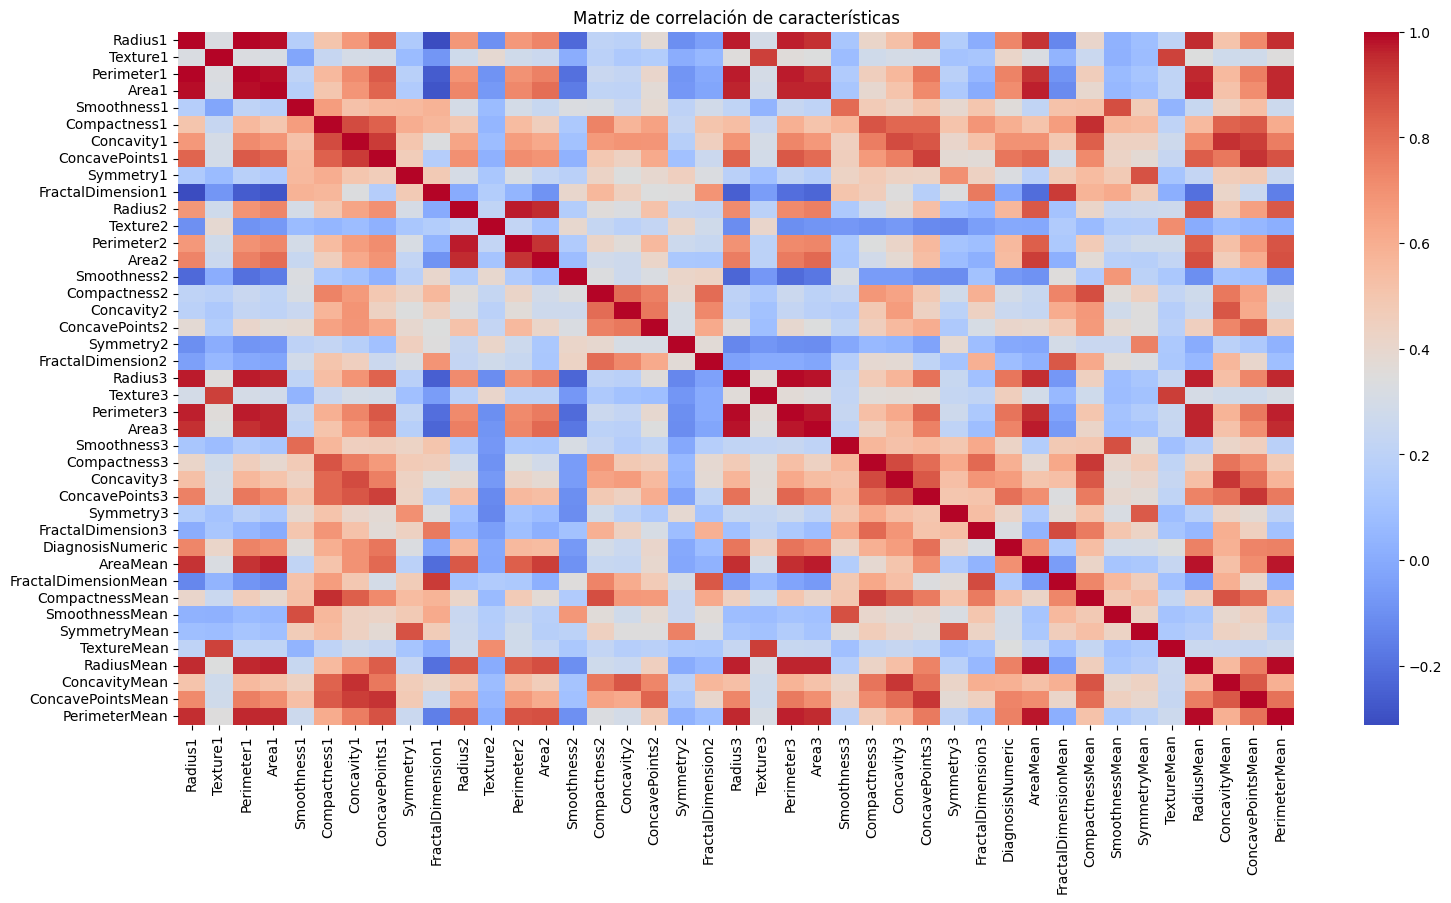

In [41]:
df_corr = X_norm.drop(columns=['Diagnosis'])
corr_matrix = df_corr.corr()

plt.figure(figsize=(18, 9))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Matriz de correlación de características")
plt.show()

Para tener una imagen mas facil de analizar tambien voy a calcular la matriz de correlacion solo para las medias

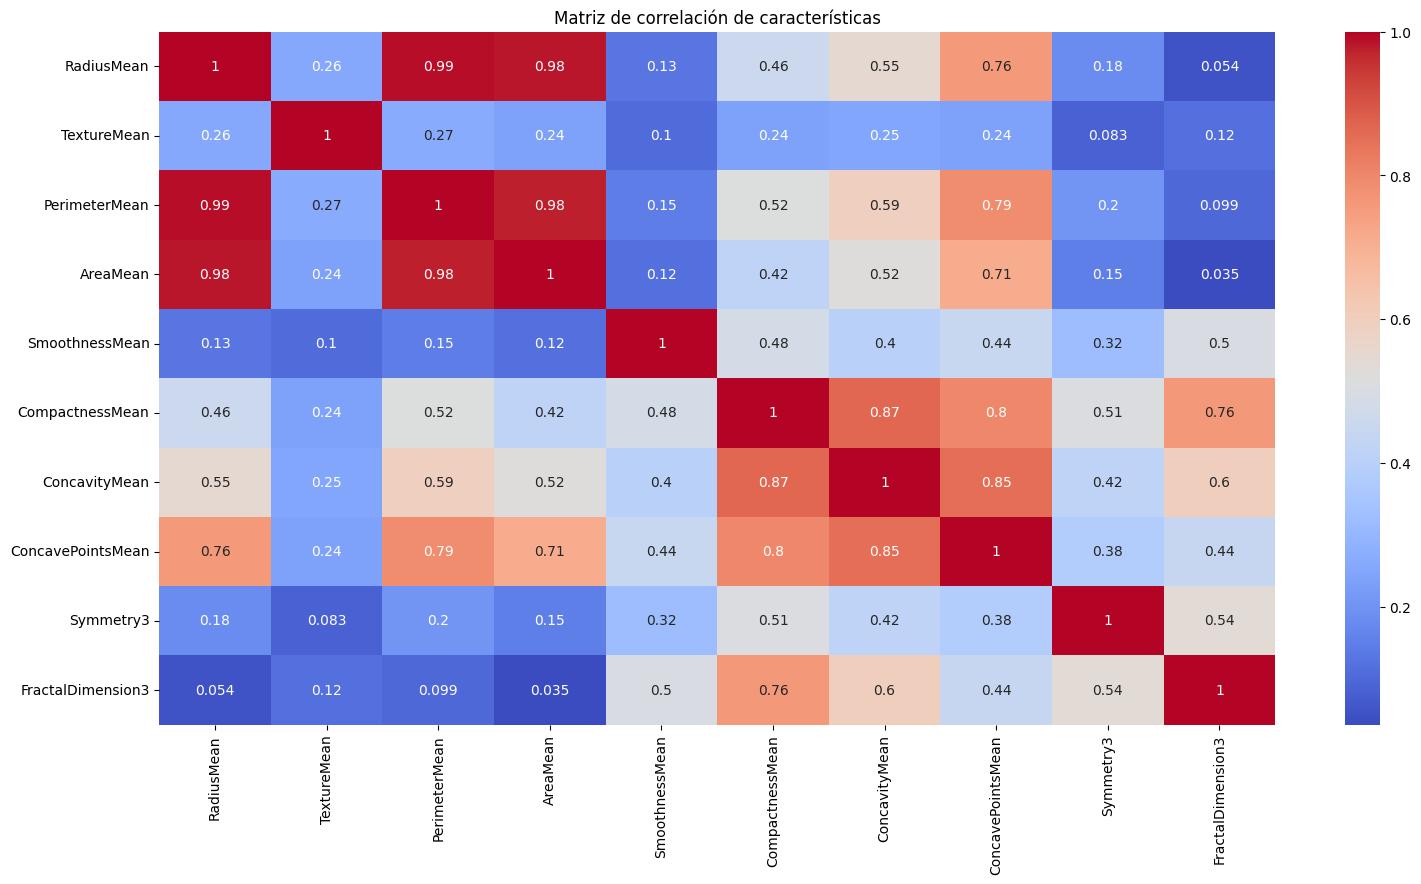

In [42]:
df_corr_mean = X_norm[features]
corr_matrix = df_corr_mean.corr()

plt.figure(figsize=(18, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación de características")
plt.show()

Vemos que la relacion entre radio, perimetro y area son bastante altas como es de esperarse

## Pregunta 14

¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

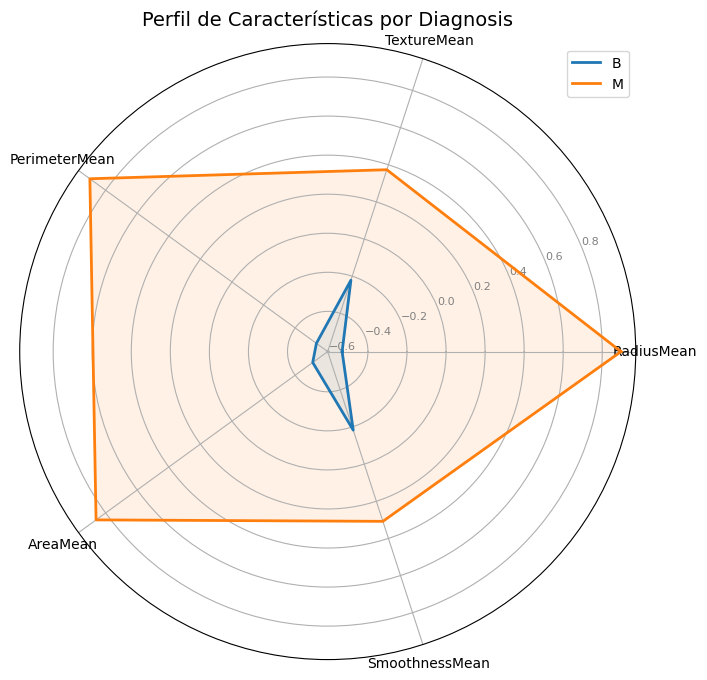

In [43]:
from math import pi
#Radar chart
# Calcular promedios por diagnosis
stats = X_norm.groupby('Diagnosis')[['RadiusMean', 'TextureMean', 'PerimeterMean', 
                                'AreaMean', 'SmoothnessMean']].mean()


categories = stats.columns.tolist()
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for diagnosis, row in stats.iterrows():
    values = row.values.tolist()
    values += values[:1]
    ax.plot(angles, values, label=diagnosis, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.yticks(color='grey', size=8)
plt.legend(loc='upper right')
plt.title('Perfil de Características por Diagnosis', size=14)
plt.show()

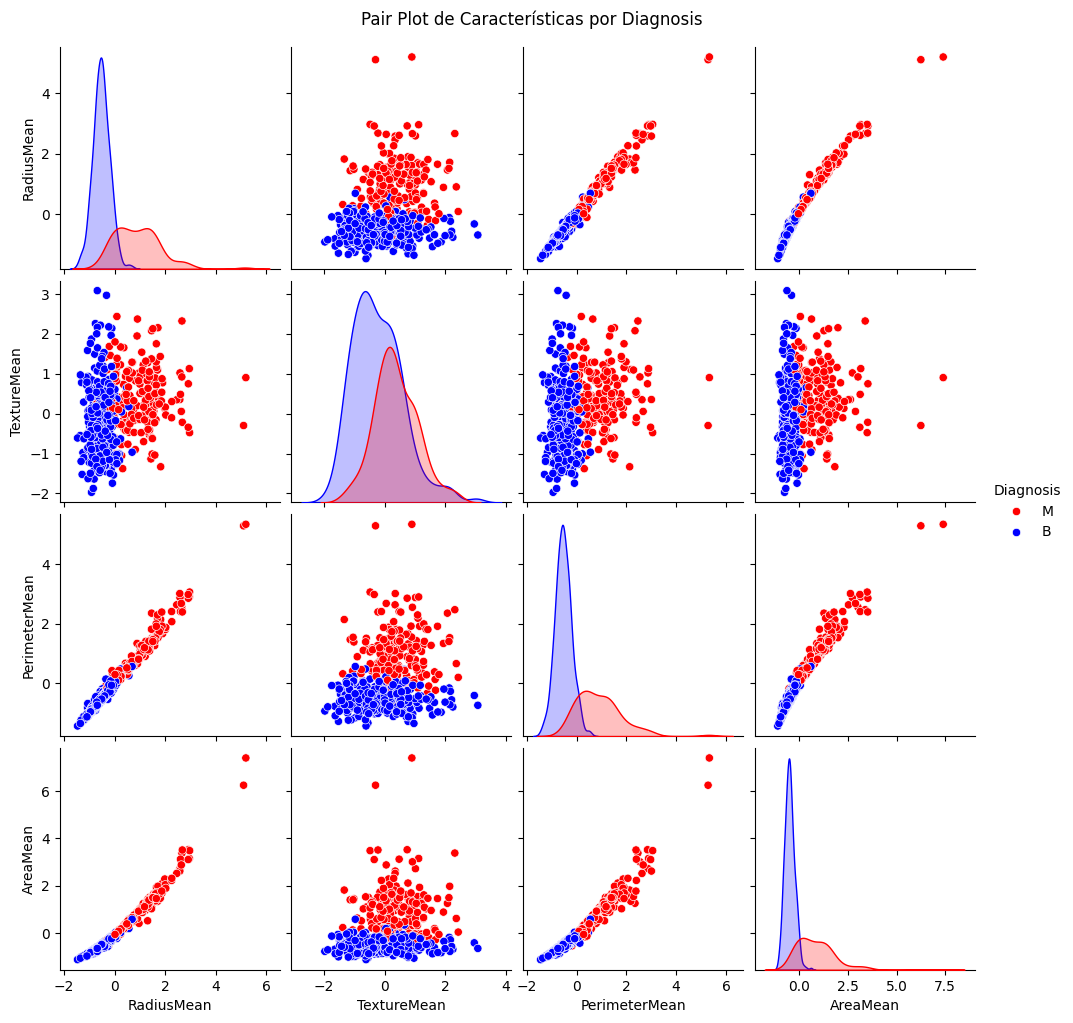

In [44]:
# Para un subset de características
features_subset = ['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'Diagnosis']
sns.pairplot(X_norm[features_subset], hue='Diagnosis', palette={'B': 'blue', 'M': 'red'})
plt.suptitle('Pair Plot de Características por Diagnosis', y=1.02)
plt.show()

Se logra notar que por lo general los tumores malignos son mas grandes y su textura tiene un valor mayor.